In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df_czech = df[(df['job_country'] == 'Czechia') & (df['job_title_short'] == 'Data Analyst')]
locations = ['Prague, Czechia', 'Brno, Czechia', 'Ostrava, Czechia']
df_czech_top = df[df['job_location'].isin(locations)]
df_plot = df_czech_top ['job_location'].value_counts().head(10).to_frame()

<Axes: xlabel='job_location'>

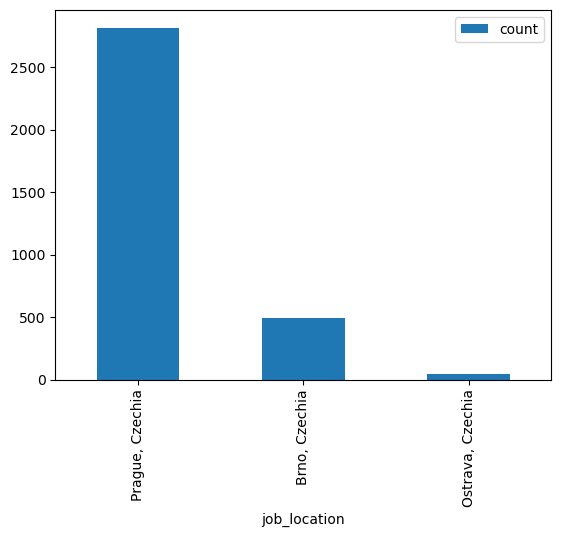

In [15]:
df_plot.plot(kind='bar')

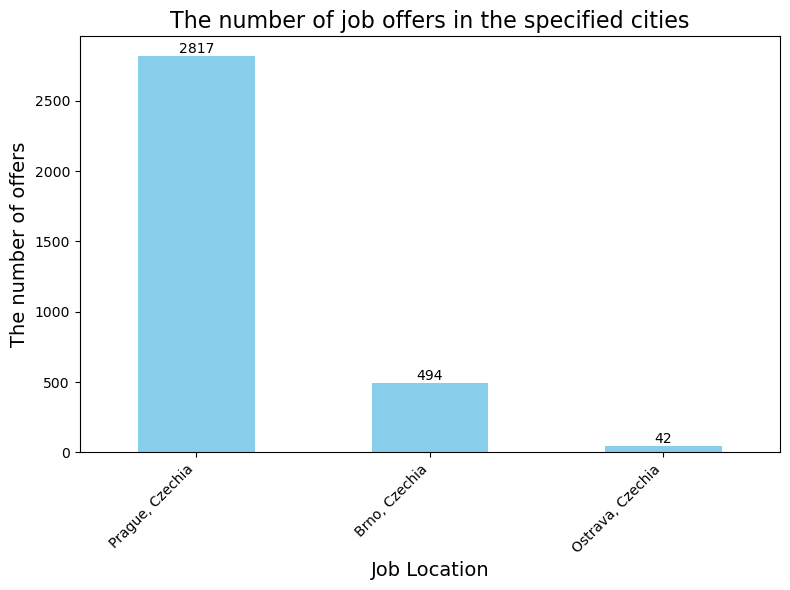

In [ ]:
import matplotlib.pyplot as plt

# Vytvoření plotu
ax = df_plot.plot(kind='bar', figsize=(8, 6), color='skyblue', legend=False)

# Přidání názvu a popisků os
plt.title('The number of job offers in the specified cities', fontsize=16)
plt.xlabel('Job Location', fontsize=14)
plt.ylabel('The number of offers', fontsize=14)

# Otočení popisků na ose x
plt.xticks(rotation=45, ha='right')

# Přidání hodnoty na každý sloupec
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Zajistí, že se popisky nebudou překrývat
plt.show()

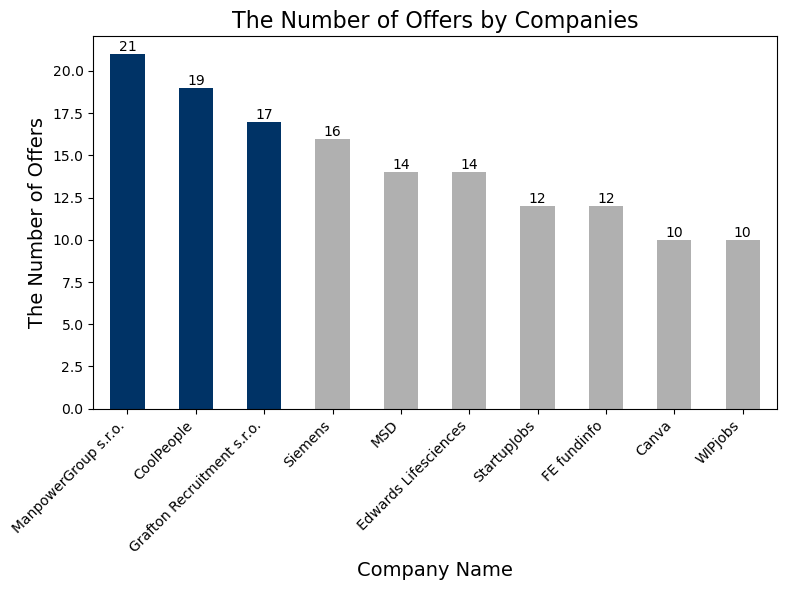

In [23]:
import matplotlib.pyplot as plt
import numpy as np

ax = df_plot.plot(kind='bar', figsize=(8, 6), legend=False)

# Nastavení barev pro sloupce
for i, p in enumerate(ax.patches):
    if i < 3:
        p.set_facecolor('#003366')  # Tmavá modrá
    else:
        p.set_facecolor('#B0B0B0')  # Šedá

# Přidání názvu a popisků os
plt.title('The Number of Offers by Companies', fontsize=16)
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('The Number of Offers', fontsize=14)

# Otočení popisků na ose x
plt.xticks(rotation=45, ha='right')

# Přidání hodnoty na každý sloupec
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Zajistí, že se popisky nebudou překrývat
plt.show()